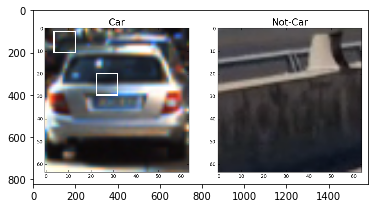

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

image = mpimg.imread('./examples/car_not_car.png')

def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    draw_img = np.copy(img)
    for bbox in bboxes:
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    return draw_img

bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]

result = draw_boxes(image, bboxes)
plt.imshow(result)

(array([53459, 55672, 37780, 29756, 24577, 35542, 51289, 53291, 32322,
        21928, 24886, 36616, 36357, 25165, 18248, 16380, 13840, 11849,
        13877, 13366, 16827, 17457, 13949, 15528, 20293, 22633, 21447,
        20671, 27818, 33818, 32370,  6589]),
 array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
          72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
         144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
         216.,  224.,  232.,  240.,  248.,  256.]))

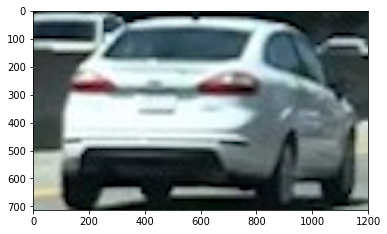

In [2]:
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('./examples/cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))
plt.imshow(image)
rhist

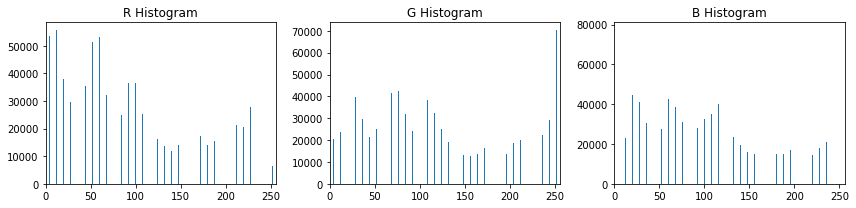

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('./examples/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = channel_hist(img[:,:,0])
    ghist = channel_hist(img[:,:,1])
    bhist = channel_hist(img[:,:,2])
    # Generating bin centers
    bin_centers = calc_bin_centers(rhist[1])
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
def channel_hist(color_channel):
    return np.histogram(color_channel, bins=32, range=(0, 256))
    
def calc_bin_centers(bin_edges):
    return (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

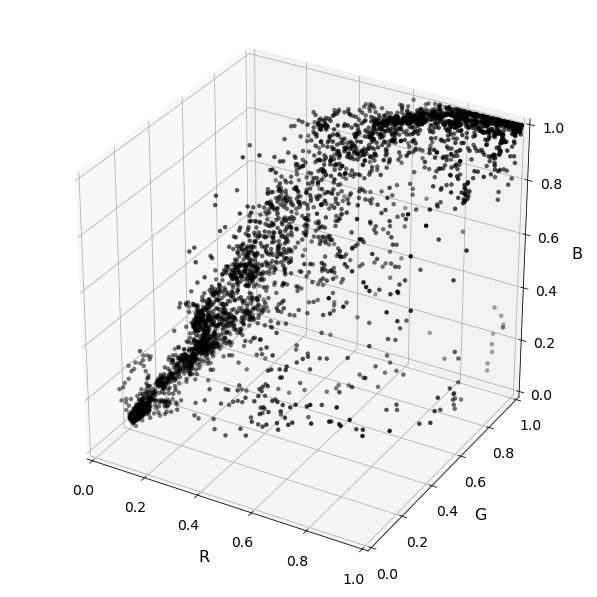

In [14]:
from util import plot3d

img = mpimg.imread('./examples/color_spaces2.png')
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
colors_rgb = img_small_RGB / 255.
plot3d(img, colors_rgb, axis_limits=[(0, 1), (0, 1), (0, 1)])

In [11]:
import os
from glob import glob

CARS_GLOB = './data/vehicles_smallset/*/*.jpeg'
NO_CARS_GLOB = './data/non-vehicles_smallset/*/*.jpeg'

cars_paths = glob(CARS_GLOB)
no_cars_paths = glob(NO_CARS_GLOB)

(720, 1280, 3)


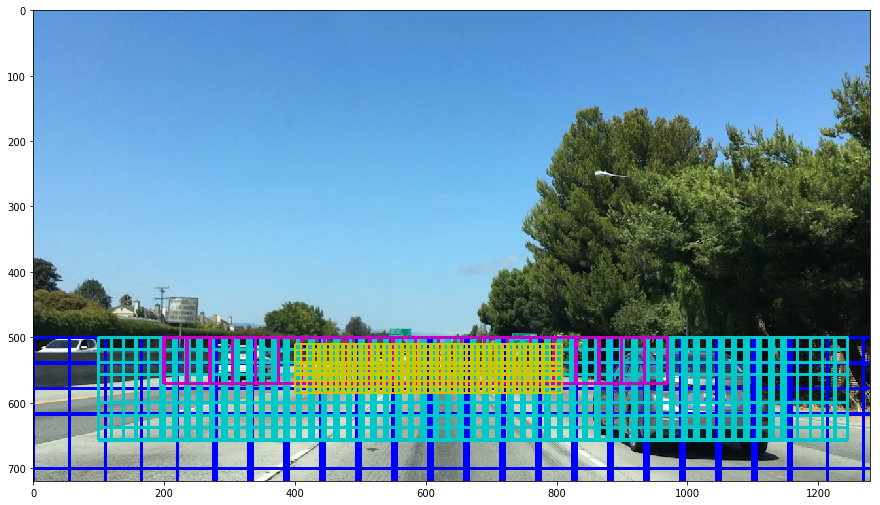

In [40]:
from sliding_window import sliding_window_gen
from itertools import chain

image = mpimg.imread('./examples/bbox-example-image.jpg')
fig = plt.figure(figsize=(15,10))
plt.imshow(image)

print(image.shape)

big_windows = sliding_window_gen(image, y_start=500, window_width=280, window_height=200, y_overlap=.8, x_overlap=.8)
window_img = draw_boxes(image, big_windows, color=(0, 0, 255), thick=3)

medium_windows = sliding_window_gen(image, 
                              y_start=500, y_stop=600, 
                              x_start=100, x_stop=1200,
                              window_width=100, window_height=100, 
                              y_overlap=.8, x_overlap=.8)

window_img = draw_boxes(window_img, medium_windows, color=(0, 200, 200), thick=3)

small_windows = sliding_window_gen(image, 
                             y_start=500, y_stop=600, 
                             x_start=200, x_stop=1000,
                             window_width=70, window_height=70, 
                             y_overlap=.5, x_overlap=.5)
window_img = draw_boxes(window_img, small_windows, color=(200, 0, 200), thick=3)


tiny_windows = sliding_window_gen(image, 
                            y_start=510, y_stop=580, 
                            x_start=400, x_stop=800,
                            window_width=30, window_height=30, 
                            y_overlap=.7, x_overlap=.7)
window_img = draw_boxes(window_img, tiny_windows, color=(200, 200, 0), thick=2)

# all_windows = chain(small_windows, medium_windows, big_windows)
# window_img = draw_boxes(image, all_windows, color=(200, 200, 0), thick=3)

plt.imshow(window_img)

### Load Model

In [35]:
from sliding_window import search_windows
from train_classifier import load_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

all_windows = chain(tiny_windows, small_windows, medium_windows, big_windows)

stored = load_model()
# search_windows()

Loaded model with 0.991397849462 accuracy


### Init windows

In [ ]:
from sliding_window import sliding_window_gen
from itertools import chain


image = mpimg.imread('./examples/bbox-example-image.jpg')
big_windows = sliding_window_gen(image, y_start=500, 
                           window_width=280, window_height=200, 
                           y_overlap=.8, x_overlap=.8)

medium_windows = sliding_window_gen(image, 
                              y_start=500, y_stop=600, 
                              x_start=100, x_stop=1200,
                              window_width=100, window_height=100, 
                              y_overlap=.8, x_overlap=.8)
small_windows = sliding_window_gen(image, 
                             y_start=500, y_stop=600, 
                             x_start=200, x_stop=1000,
                             window_width=70, window_height=70, 
                             y_overlap=.7, x_overlap=.7)

tiny_windows = sliding_window_gen(image, 
                            y_start=510, y_stop=580, 
                            x_start=400, x_stop=800,
                            window_width=30, window_height=30, 
                            y_overlap=.7, x_overlap=.7)

### Find Cars

trying window Window(start_xy=(400, 510), stop_xy=(430, 540))
trying window Window(start_xy=(409, 510), stop_xy=(439, 540))
trying window Window(start_xy=(418, 510), stop_xy=(448, 540))
trying window Window(start_xy=(427, 510), stop_xy=(457, 540))
trying window Window(start_xy=(436, 510), stop_xy=(466, 540))
trying window Window(start_xy=(445, 510), stop_xy=(475, 540))
trying window Window(start_xy=(454, 510), stop_xy=(484, 540))
trying window Window(start_xy=(463, 510), stop_xy=(493, 540))
trying window Window(start_xy=(472, 510), stop_xy=(502, 540))
trying window Window(start_xy=(481, 510), stop_xy=(511, 540))
trying window Window(start_xy=(490, 510), stop_xy=(520, 540))
trying window Window(start_xy=(499, 510), stop_xy=(529, 540))
trying window Window(start_xy=(508, 510), stop_xy=(538, 540))
trying window Window(start_xy=(517, 510), stop_xy=(547, 540))
trying window Window(start_xy=(526, 510), stop_xy=(556, 540))
trying window Window(start_xy=(535, 510), stop_xy=(565, 540))
trying w

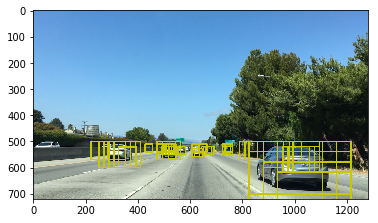

In [38]:
from util import draw_boxes
hot_windows = search_windows(image, all_windows, stored['model'], stored['scaler'])
window_img = draw_boxes(image, hot_windows, color=(200, 200, 0), thick=3)

plt.imshow(window_img)

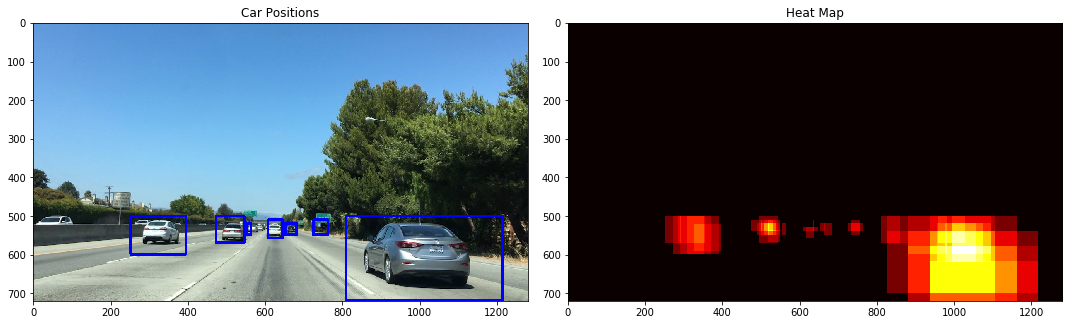

In [55]:
import numpy as np
from scipy.ndimage.measurements import label
import cv2

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = np.zeros_like(image[:,:,0]).astype(np.float)
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()